# Deep Learning: Assignment 2

<ol>
<li>Plot simple Sigmoid Neuron Function using matplotlib or seaborn python libraries
<li>Plot a 2-D Contour plot for dummny values of X and Y
<li>Plot a 3-D Contour plot for dummny values of X and Y
<li>Train SigmoidNeuron Model on the dummy TOY dataset and do contour plotting
<li>Run the SigmoidNeuron Model on any dataset of your choice.
</ol>

### Import necessary libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Sigmoid Neuron

**1-D Sigmoid Neuron**

In [2]:
#function for simple sigmoid neuron
def sigmoid(x, w, b):
    return 1/(1 + np.exp(-(w*x + b)))

In [3]:
#input data
values = np.arange(-10, 10, 0.1)
w = 1.0
b = 1.0

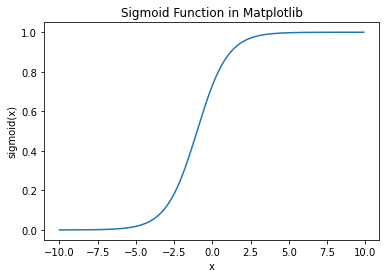

In [4]:
#plot for 1-D sigmoid neuron
plt.plot(values, sigmoid(values,w,b))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function in Matplotlib')
plt.show()

**2-D Sigmoid Neuron**

In [5]:
#function for sigmoid neuron considering two parameters
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [6]:
#input data
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

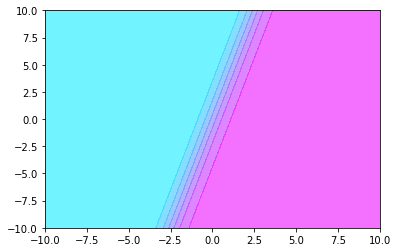

In [7]:
#calculate results for 2-D sigmoid neuron
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

#plot 2-D sigmoid neuron
plt.contourf(XX1, XX2, Y, cmap = 'cool', alpha = 0.6)
plt.show()

**3-D Sigmoid Neuron**

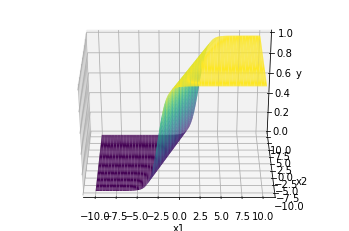

In [8]:
#plot for 3-D sigmoid neuron
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)

### Loss Function

In [9]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

In [10]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [11]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [12]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

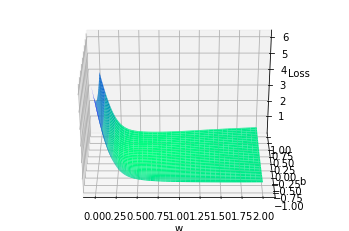

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='winter_r')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

### Sigmoid Neuron

**Sigmoid Neuron Class**

In [14]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=False):
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        if display_loss:
            loss = {}
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            #print(self.w)
            #print(self.b)
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * y

**Fit Sigmoid Neuron Class and Obtain Results**

In [15]:
#dummy data for sigmoid neuron class
X = np.asarray([[-5, 0],[0, 7],[-5, 5], [-2, 2], [-3, -3], [4, 5], [5, -5], [6, 0],[3, 0],[1, -7]])
Y = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [16]:
#function to plot the results
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap='magma', alpha=0.6)
    ax.scatter(X[:,0], X[:,1],c=Y, cmap='autumn_r')
    ax.plot()

100%|██████████| 1/1 [00:00<00:00, 501.47epoch/s]

[[-0.84056903 -1.44000462]] [0.00823735]
[[-1.20185926 -1.08672013]] [0.09863867]



100%|██████████| 1/1 [00:00<00:00, 505.34epoch/s]

[[-1.72060602 -0.56283544]] [0.18757456]
[[-1.76079361 -0.23744862]] [0.20116607]



100%|██████████| 1/1 [00:00<00:00, 502.61epoch/s]


[[-1.82773333  0.65683419]] [0.26387621]
[[-1.82954813  0.65508953]] [0.26416448]


100%|██████████| 1/1 [00:00<00:00, 337.90epoch/s]


[[-1.83131702  0.65340306]] [0.26444831]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.83304253  0.65177179]] [0.26472792]


100%|██████████| 1/1 [00:00<00:00, 1003.66epoch/s]


[[-1.83472697  0.65019297]] [0.26500354]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.83637245  0.64866403]] [0.26527538]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.83798095  0.64718263]] [0.26554362]


100%|██████████| 1/1 [00:00<00:00, 252.62epoch/s]


[[-1.8395543   0.64574657]] [0.26580846]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.84109419  0.64435382]] [0.26607005]


100%|██████████| 1/1 [00:00<00:00, 308.50epoch/s]


[[-1.8426022   0.64300248]] [0.26632855]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.8440798   0.64169078]] [0.2665841]


100%|██████████| 1/1 [00:00<00:00, 1001.27epoch/s]


[[-1.84552835  0.64041707]] [0.26683684]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.84694915  0.63917979]] [0.2670869]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.84834337  0.6379775 ]] [0.26733438]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.84971216  0.63680882]] [0.26757942]


100%|██████████| 1/1 [00:00<00:00, 337.90epoch/s]


[[-1.85105656  0.63567246]] [0.2678221]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.85237757  0.63456723]] [0.26806253]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.85367611  0.63349198]] [0.2683008]


100%|██████████| 1/1 [00:00<00:00, 308.43epoch/s]


[[-1.85495308  0.63244562]] [0.268537]


100%|██████████| 1/1 [00:00<00:00, 1077.40epoch/s]


[[-1.85620928  0.63142713]] [0.2687712]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-1.85744552  0.63043556]] [0.2690035]


100%|██████████| 1/1 [00:00<00:00, 999.36epoch/s]


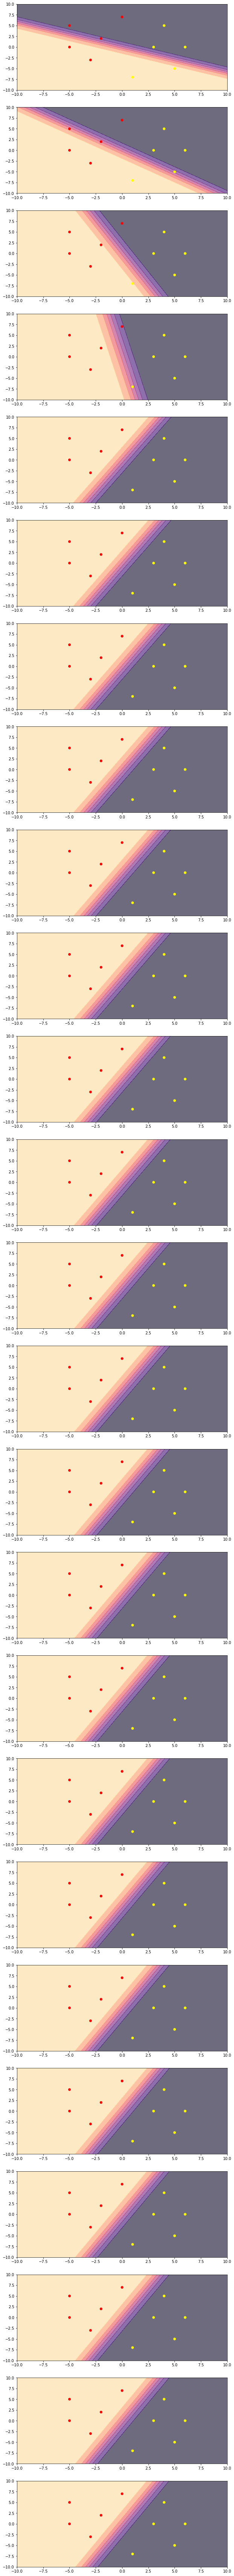

In [17]:
#create model object
sigmoid_neuron = SigmoidNeuron()

#fit the model and view results
sigmoid_neuron.fit(X, Y, 1, 0.05, True)
N = 25
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sigmoid_neuron.w, sigmoid_neuron.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sigmoid_neuron, ax)
    sigmoid_neuron.fit(X, Y, 1, 0.5, False)

### Fit Sigmoid Neuron Class for Actual Data and View Results

**Load and View Dataset**

In [18]:
#import dataset
df = pd.read_csv('C:/Users/Admin/Downloads/Medical_X_data.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           6000 non-null   float64
 1   Systolic_BP   6000 non-null   float64
 2   Diastolic_BP  6000 non-null   float64
 3   Cholesterol   6000 non-null   float64
 4   Outcome       6000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 234.5 KB


In [20]:
df.describe()

,Age,Systolic_BP,Diastolic_BP,Cholesterol,Outcome
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255,0.514500
std,8.564392,10.669267,9.648200,10.433915,0.499831
min,35.164761,69.675429,62.807105,69.967453,0.000000
25%,54.371941,93.267420,83.641788,93.202373,0.000000
50%,59.831159,100.119926,89.912429,100.060637,1.000000
75%,65.809652,107.439501,96.682405,107.250829,1.000000
max,103.279497,151.699660,133.456382,148.233544,1.000000


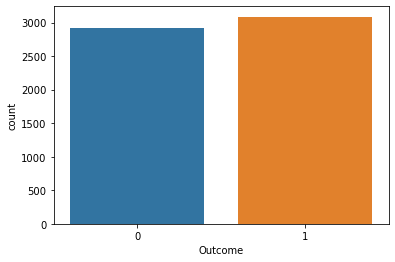

In [21]:
sns.countplot(data=df, x='Outcome')

**Split Dataset for Train and Test and Normalize Data**

In [22]:
x = df[["Age","Systolic_BP","Diastolic_BP","Cholesterol"]]
y = df["Outcome"]
print("x shape is",x.shape)
print("y shape is",y.shape)

x shape is (6000, 4)
y shape is (6000,)


In [23]:
#Splitting the dataset into test data and train data
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.7, random_state=5)

In [24]:
print("x_train shape is",x_train.shape)
print("x_test shape is",x_test.shape)
print("y_train shape is",y_train.shape)
print("y_train shape is",y_test.shape)

x_train shape is (4200, 4)
x_test shape is (1800, 4)
y_train shape is (4200,)
y_train shape is (1800,)


In [25]:
display(x_train.dtypes)

Age             float64
Systolic_BP     float64
Diastolic_BP    float64
Cholesterol     float64
dtype: object

In [26]:
display(y_train.dtypes)

dtype('int64')

**Sigmoid Neuron Class**

In [27]:
class SigmoidNeuron__:
    def __init__(self, learning_rate=0.01, epochs = 1000):
        self.b = None   #bias
        self.W = None
        self.lr = learning_rate
        self.iters = epochs
        self.errorPerItr = None
        
    def sigmoid_func(self,power):
        return 1.0/(1.0 + np.exp(-power))
    
    def predict(self, X):
        y_pred = []
        for index in range(len(X)):
            x=X.iloc[index]
            linear_output = np.dot(x, self.W.T) + self.b  #we got the exponent
            y_predicted = self.sigmoid_func(linear_output)
            y_pred.append(y_predicted)
        return y_pred
        
    
    #sigmoid neuron needs a principled learning algorithm for learning the values of W and B
    def fit(self, X, Y):
        self.b = 0
        n_features = X.shape[1]
        self.W = np.zeros(n_features)
        
        #ensure that y is 0 or 1
        y_ = np.array([1 if i>0 else 0 for i in Y])
        
        self.errorPerItr = []
        
        for itr in range(self.iters):
            grad_w = 0
            grad_b = 0
            loss = 0
            for index in range(len(X)):
                x=X.iloc[index]
                linear_output = np.dot(x, self.W) + self.b 
                y_predicted = self.sigmoid_func(linear_output)
                fx = y_predicted
                
                y= Y.iloc[index]
                grad_w += (fx - y)*fx*(1-fx)*np.dot(np.ones(n_features), x)
                grad_b += (fx - y)*fx*(1-fx)
                
                #for each epoch we will calculate the loss
                loss += (fx - y)**2
            self.errorPerItr.append(0.5 * loss)
            #print("L: ", 0.5 * loss)
            
            #calculate new W and b
            for i in range(n_features): # since W is a vector
                self.W[i] -= self.lr*grad_w
            self.b -= self.lr*grad_b    # b is a scalar
            #print("w: ", self.W)
            #print("B: ", self.b)

**Fit Data and Predict Values**

In [28]:
sn_Model = SigmoidNeuron__(learning_rate = 0.01, epochs=20)
sn_Model.fit(x_train,y_train)

In [29]:
prediction = sn_Model.predict(x_test)

**View Results**

In [30]:
print("Accuracy : ", accuracy_score(y_test, prediction))

Accuracy :  0.5211111111111111
